In [1]:
import pandas as pd
df = pd.read_csv('cleaned_bikes.csv')
df.head(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,15.433333,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0
1,9080521,3/31/2016 22:59,3/31/2016 23:02,3439,3.300000,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974.0


In [2]:
## What has been the trend of rides across time
df['starttime'] = pd.to_datetime(df['starttime'])
df['months'] = df['starttime'].dt.month

<AxesSubplot:xlabel='months'>

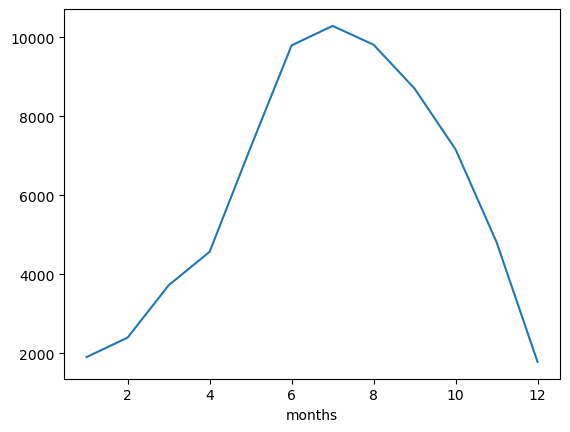

In [3]:
df.groupby('months').size().plot()

In [4]:
## This could be due to the weather. Let's bring in external dataset to validate this
w = pd.read_csv("weather_chicago.csv")

In [5]:
w.head(2)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Chicago,2016-01-01,-0.8,-6.8,-3.3,-5.9,-14.5,-9.9,-8.2,69.3,...,6.5,3,NaN,2016-01-01T07:18:17,2016-01-01T16:29:46,0.72,"Snow, Partially cloudy",Partly cloudy throughout the day with morning ...,snow,"72534014819,KORD,KMDW,72530094846,74466504838,..."
1,Chicago,2016-01-02,0.5,-5.9,-2.1,-4.7,-10.4,-7.5,-7.0,69.3,...,9.0,5,NaN,2016-01-02T07:18:22,2016-01-02T16:30:38,0.77,Clear,Clear conditions throughout the day.,clear-day,"72534014819,KORD,KMDW,72530094846,74466504838,..."


In [6]:
w['datetime'] = pd.to_datetime(w['datetime'])
w['months'] = w['datetime'].dt.month

<AxesSubplot:xlabel='months'>

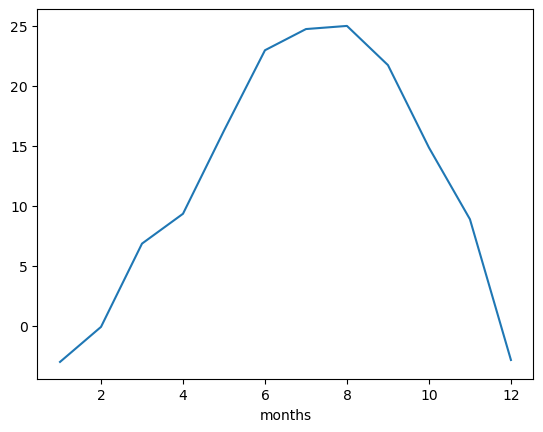

In [7]:
w.groupby('months')['temp'].mean().plot()

<AxesSubplot:xlabel='months'>

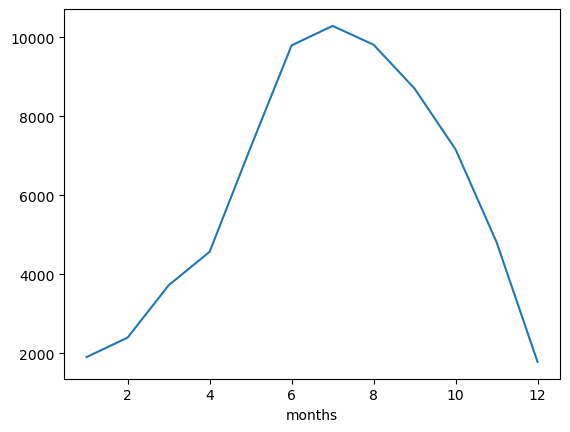

In [8]:
df.groupby('months').size().plot()

<AxesSubplot:xlabel='dayweek'>

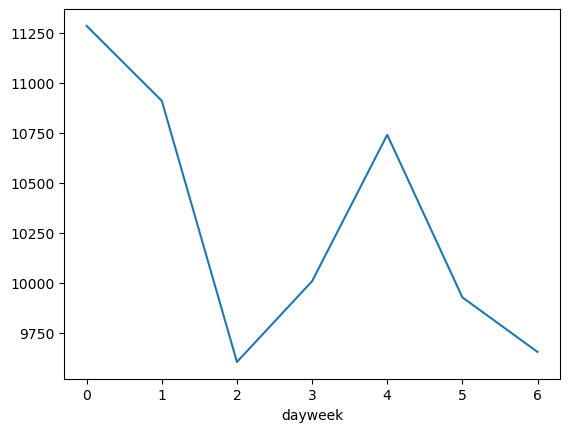

In [9]:
### Is there a pattern by dayofweek?
df['dayweek'] = df['starttime'].dt.weekday
df.groupby('dayweek').size().plot()

In [10]:
## Is there any pattern by timeofday
df['hour'] = df['starttime'].dt.hour

<AxesSubplot:xlabel='hour'>

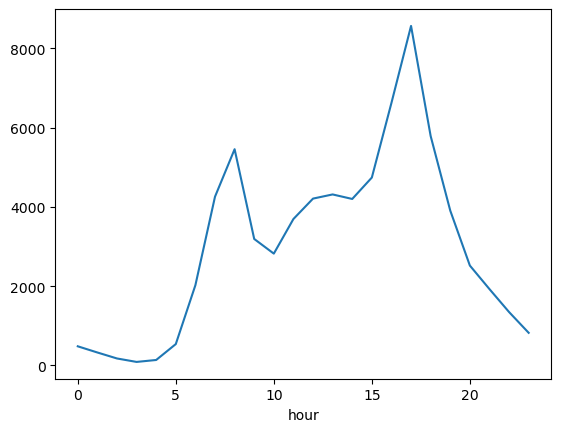

In [11]:
df.groupby('hour').size().plot() ## More evening trips than morning

<AxesSubplot:xlabel='hour'>

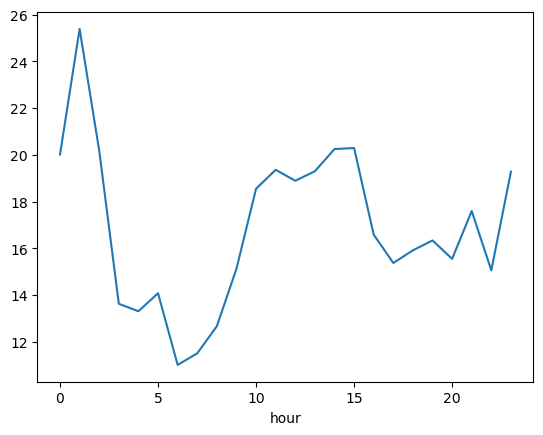

In [12]:
## Is there any pattern on trip duration by hour of day and also by month?
df.groupby('hour')['tripduration'].mean().plot() ##trips in morning are longer

<AxesSubplot:xlabel='months'>

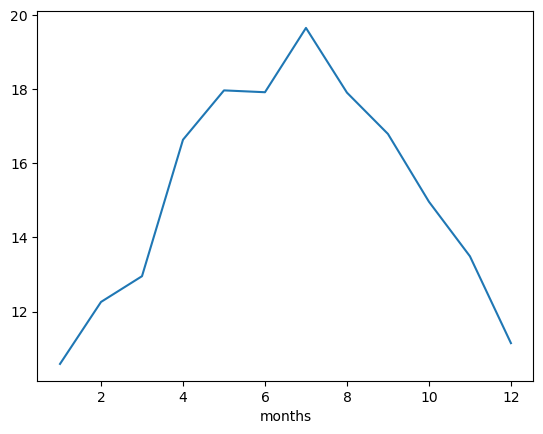

In [14]:
df.groupby('months')['tripduration'].mean().plot() ## follows the same trend as monthly nookings, duration also decreases in winter months

<AxesSubplot:xlabel='hour'>

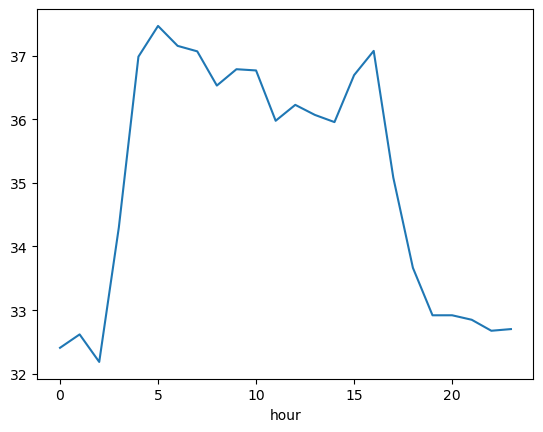

In [15]:
## Any relationship between age and hour of day
df['age'] = 2016-df['birthyear']
df.groupby('hour')['age'].mean().plot() ## only very young people ride during early morning or late night hours